#**Importing Required Modules**

In [2]:
# Importing Required modules

# For data manipulation and analysis
import pandas as pd
import numpy as np
# For data visualization
import seaborn as sns
from matplotlib import pyplot as plt
# For data preprocessing and feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
# For data splitting and model selection
from sklearn.model_selection import train_test_split, GridSearchCV
# For statistical analysis
from scipy import stats
# For pipeline creation (combining preprocessing and modeling)
from sklearn.pipeline import make_pipeline
# Regression models
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
# Classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Evaluation metrics for classification
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Evaluation metrics for regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Upload file from google colab
from google.colab import files
uploaded = files.upload()

#**Loading Dataset**

In [4]:
# Loadng and reading data into data with the help of pandas
data = pd.read_csv("US Airline Flight Routes and Fares 1993-2024.csv", low_memory= False)

#**Exploring Dataset**

In [5]:
# Displaying the first 5 data ofthe dataset
display(data.head())

tbl  Year  quarter  citymarketid_1  citymarketid_2  \
0  Table1a  2021        3           30135           33195   
1  Table1a  2021        3           30135           33195   
2  Table1a  2021        3           30140           30194   
3  Table1a  2021        3           30140           30194   
4  Table1a  2021        3           30140           30466   

                            city1                          city2  airportid_1  \
0  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
1  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
2                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
3                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
4                 Albuquerque, NM                    Phoenix, AZ        10140   

   airportid_2 airport_1  ...    fare  carrier_lg  large_ms  fare_lg  \
0        14112       ABE  ...   81.43          G4    1.0000    81.43   
1        15304       ABE  ...  208.93          DL    0.4659   219.98   
2        11259       ABQ  ...  184.56          WN    0.9968   184.44   
3        11298       ABQ  ...  182.64          AA    0.9774   183.09   
4        14107       ABQ  ...  177.11          WN    0.6061   184.49   

  carrier_low   lf_ms  fare_low Geocoded_City1  Geocoded_City2  \
0          G4  1.0000     81.43            NaN             NaN   
1          UA  0.1193    154.11            NaN             NaN   
2          WN  0.9968    184.44            NaN             NaN   
3          AA  0.9774    183.09            NaN             NaN   
4          AA  0.3939    165.77            NaN             NaN   

                 tbl1apk  
0  202131013514112ABEPIE  
1  202131013515304ABETPA  
2  202131014011259ABQDAL  
3  202131014011298ABQDFW  
4  202131014014107ABQPHX  

[5 rows x 23 columns]

In [6]:
# The shape of the dataset
data.shape

(245955, 23)

In [7]:
# Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

##**Dataset Overview**

The dataset contains **245,955 records** and **23 columns**, representing airline market and fare information between different cities and airports across quarters and years.

* It includes **categorical, numerical, and geographical fields** such as:

  * **City and airport identifiers** (**city1**, **city2**, **airport_1**, **airport_2**)
  * **Distance and traffic metrics** (**nsmiles**, **passengers**, **fare**)
  * **Market share and fare for carriers** (**fare_lg**, **fare_low**, **large_ms**, **lf_ms**)
  * **Time-based features** (**Year**, **quarter**)
* Some columns contain **missing values**, especially:

  * **carrier_lg**, **carrier_low**, **fare_lg**, **fare_low**, **large_ms**, and **lf_ms** (up to \~1,600 missing)
  * **Geocoded_City1** and **Geocoded_City2** have more significant missing data

#**Statstical Description**

In [8]:
data.describe().T

count          mean          std         min        25%  \
Year            245955.0   2008.524124     8.703364   1993.0000   2001.000   
quarter         245955.0      2.479153     1.122149      1.0000      1.000   
citymarketid_1  245955.0  31556.430201  1089.872880  30135.0000  30721.000   
citymarketid_2  245955.0  32180.117086  1232.464184  30189.0000  30994.000   
airportid_1     245955.0  12437.099986  1431.665257  10135.0000  11193.000   
airportid_2     245955.0  13249.889525  1425.810159  10466.0000  12197.000   
nsmiles         245955.0   1189.812319   703.143472    109.0000    626.000   
passengers      245955.0    299.476795   511.389486      0.0000     21.000   
fare            245955.0    218.979587    82.372486     50.0000    164.620   
large_ms        244415.0      0.665252     0.224635      0.0038      0.480   
fare_lg         244415.0    218.710963    84.674363     50.0000    161.500   
lf_ms           244343.0      0.450438     0.332669      0.0100      0.158   
fare_low        244343.0    190.675939    73.577694     50.0000    140.060   

                       50%         75%      max  
Year             2008.0000   2016.0000   2024.0  
quarter             2.0000      3.0000      4.0  
citymarketid_1  31423.0000  32467.0000  35412.0  
citymarketid_2  32211.0000  33192.0000  35628.0  
airportid_1     12266.0000  13487.0000  16440.0  
airportid_2     13303.0000  14679.0000  15919.0  
nsmiles          1023.0000   1736.0000   2724.0  
passengers        113.0000    339.0000   8301.0  
fare              209.3200    262.8900   3377.0  
large_ms            0.6524      0.8719      1.0  
fare_lg           208.0300    263.6400   2725.6  
lf_ms               0.3600      0.7500      1.0  
fare_low          181.6300    230.0400   2725.6

1. **Time Range**

   * The data spans from **1993 to 2024**, with a **mean year of \~2008**, suggesting a good historical range for trend analysis.
   * The **quarter** values range from **1 to 4**, indicating correct seasonal granularity.

2. **City & Airport Identifiers**

   * **citymarketid_1** and **citymarketid_2** have wide ranges (e.g., 30135 to 35628), showing diverse market coverage.
   * **airportid_1** and **airportid_2** also show large variation, suggesting the inclusion of many unique airport routes.

3. **Route Distance (**nsmiles**)**

   * Average distance between cities is **\~1,190 miles**, with a maximum of **2,724 miles**, indicating a mix of short-haul and long-haul routes.

4. **Passenger Volume**

   * The average number of passengers per route is **\~299**, but the distribution is right-skewed with a maximum of **8,301**, indicating some very high-traffic routes.

5. **Fare Analysis**

   * **Overall average fare** is **\~\$219**, with most fares falling between **\$165 and \$263**.
   * The **maximum fare** is **\$3,377**, a possible outlier.
   * Average fares for **large carriers (**fare_lg**)** and **low-fare carriers (**fare_low**)** are **similar**, at **\$218** and **\$190** respectively.

6. **Market Share Metrics**

   * **Large carrier market share (**large_ms**)** has a mean of **0.66**, suggesting dominance in most markets.
   * **Low-fare carrier market share (**lf_ms**)** is much lower, with a mean of **0.45**, and varies widely (from **0.01 to 1.0**), indicating niche or emerging competition.


In [9]:
# Column List
data.columns.tolist()

['tbl',
 'Year',
 'quarter',
 'citymarketid_1',
 'citymarketid_2',
 'city1',
 'city2',
 'airportid_1',
 'airportid_2',
 'airport_1',
 'airport_2',
 'nsmiles',
 'passengers',
 'fare',
 'carrier_lg',
 'large_ms',
 'fare_lg',
 'carrier_low',
 'lf_ms',
 'fare_low',
 'Geocoded_City1',
 'Geocoded_City2',
 'tbl1apk']

In [10]:
# Datatypes of dataset
data.dtypes

tbl                object
Year                int64
quarter             int64
citymarketid_1      int64
citymarketid_2      int64
city1              object
city2              object
airportid_1         int64
airportid_2         int64
airport_1          object
airport_2          object
nsmiles             int64
passengers          int64
fare              float64
carrier_lg         object
large_ms          float64
fare_lg           float64
carrier_low        object
lf_ms             float64
fare_low          float64
Geocoded_City1     object
Geocoded_City2     object
tbl1apk            object
dtype: object

#**DATA CLEANING**

In [11]:
# chcecking for missing values
data.isnull().sum()

tbl                   0
Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
airport_1             0
airport_2             0
nsmiles               0
passengers            0
fare                  0
carrier_lg         1540
large_ms           1540
fare_lg            1540
carrier_low        1612
lf_ms              1612
fare_low           1612
Geocoded_City1    39206
Geocoded_City2    39206
tbl1apk               0
dtype: int64

#**Handling Null Values**

In [12]:
# Drop columns where all values are null
data.dropna(axis=1, how='all')

# Count unique values in each column
data.nunique()

tbl                    2
Year                  31
quarter                4
citymarketid_1       141
citymarketid_2       128
city1                141
city2                128
airportid_1          188
airportid_2          173
airport_1            187
airport_2            173
nsmiles             1155
passengers          3883
fare               36323
carrier_lg            67
large_ms            7367
fare_lg            37508
carrier_low           71
lf_ms               9687
fare_low           32283
Geocoded_City1       238
Geocoded_City2       207
tbl1apk           245955
dtype: int64

In [13]:
# Find Duplicate values
duplicates = data.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [14]:
data_cleaned = data.dropna()

# Drop columns with any missing values
data_cleaned_columns = data.dropna(axis=1)

print(data_cleaned.shape)
print(data_cleaned_columns.shape)

(205189, 23)
(245955, 15)


#**Exploratory Data Analysis**

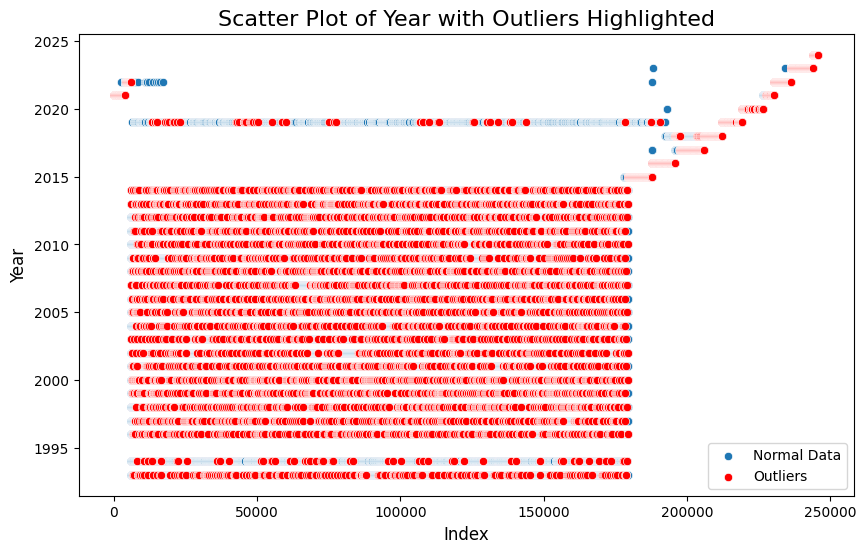

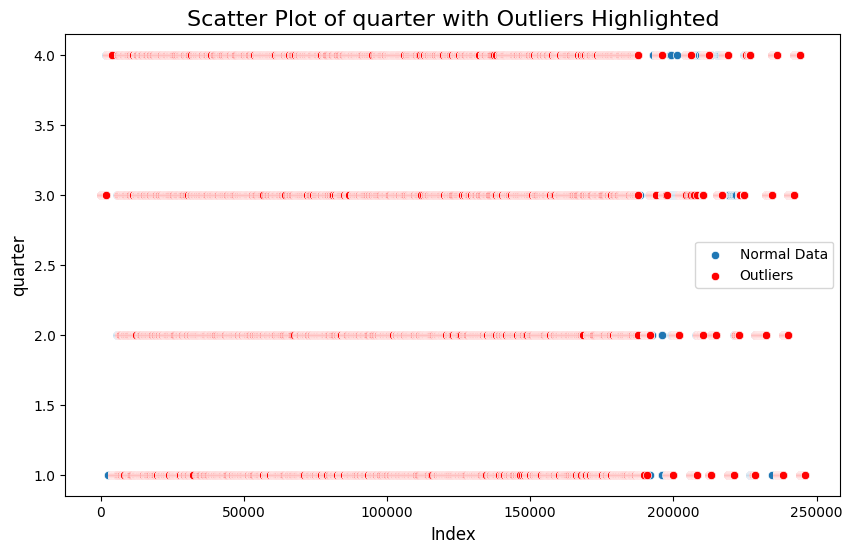

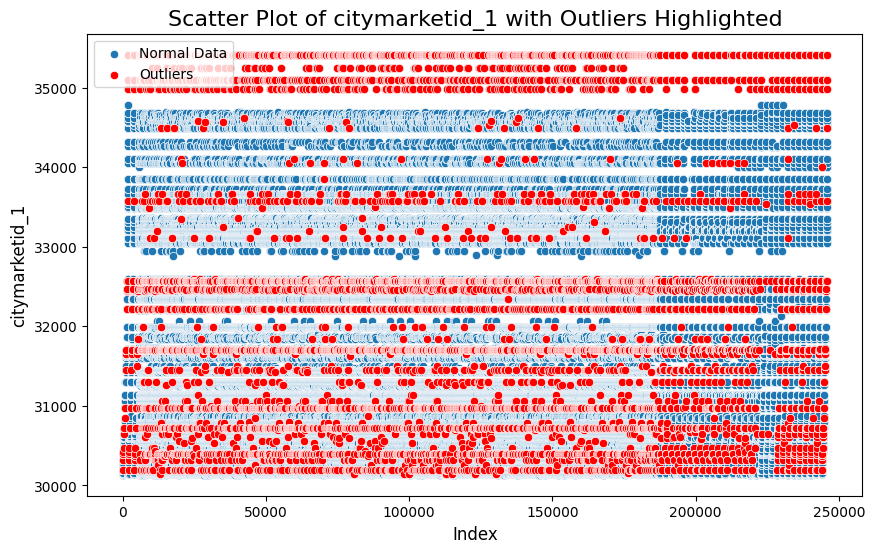

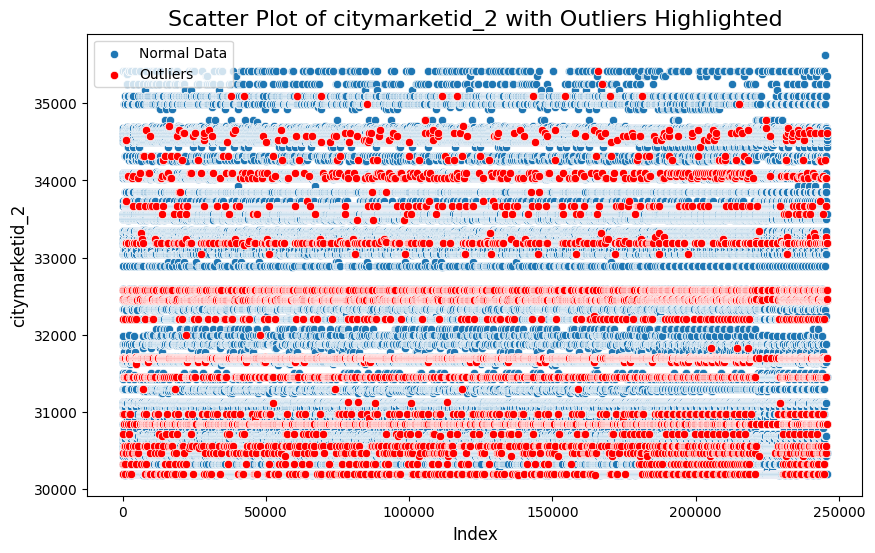

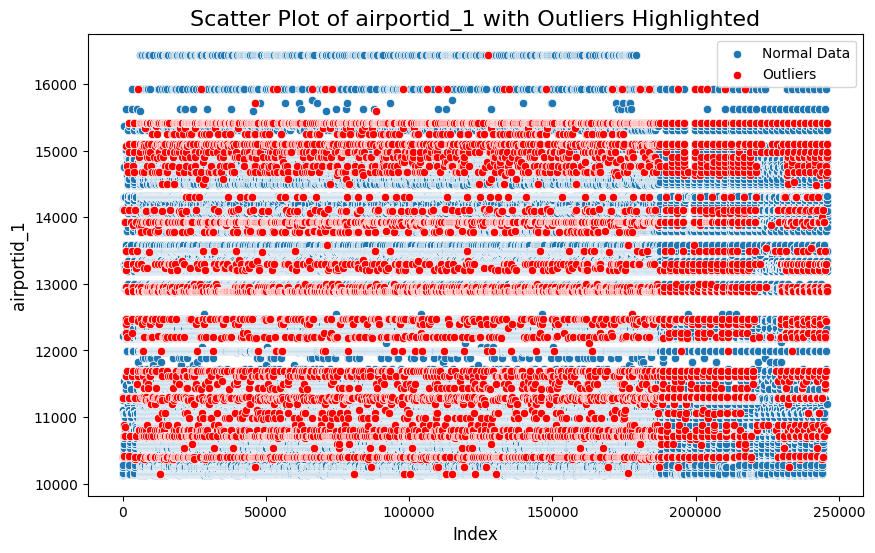

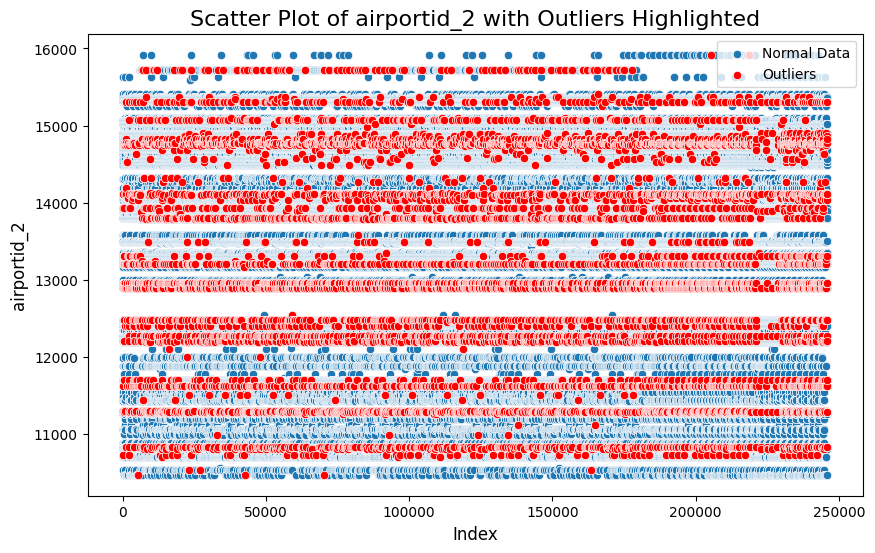

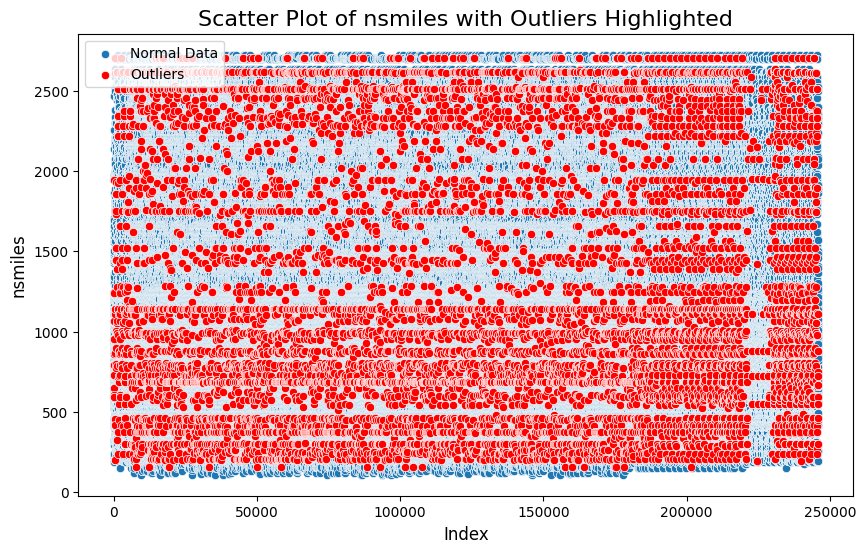

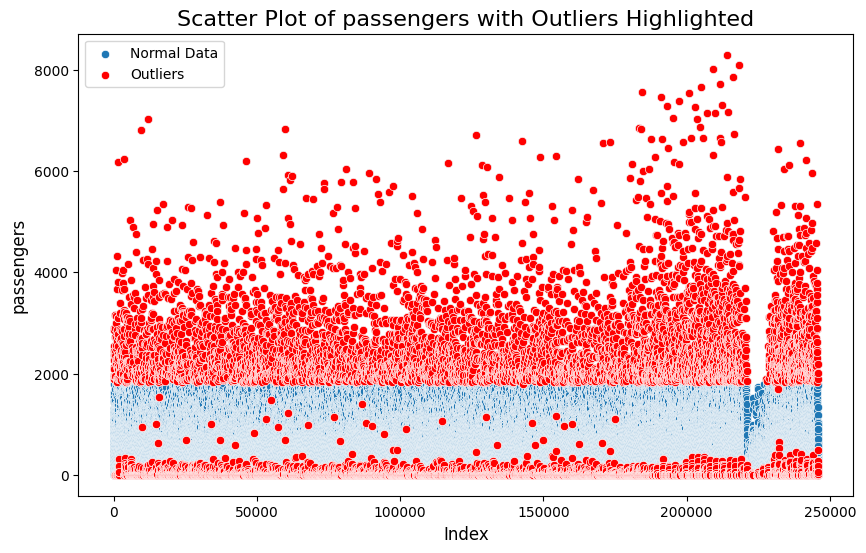

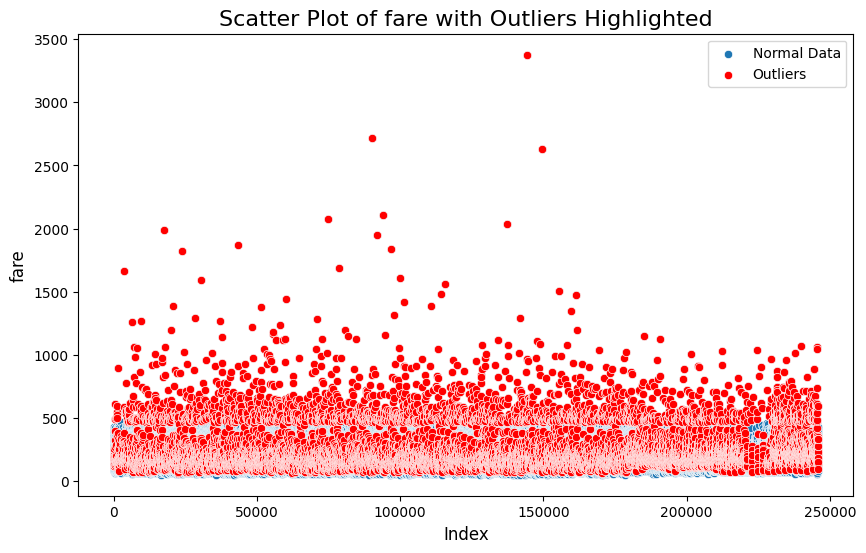

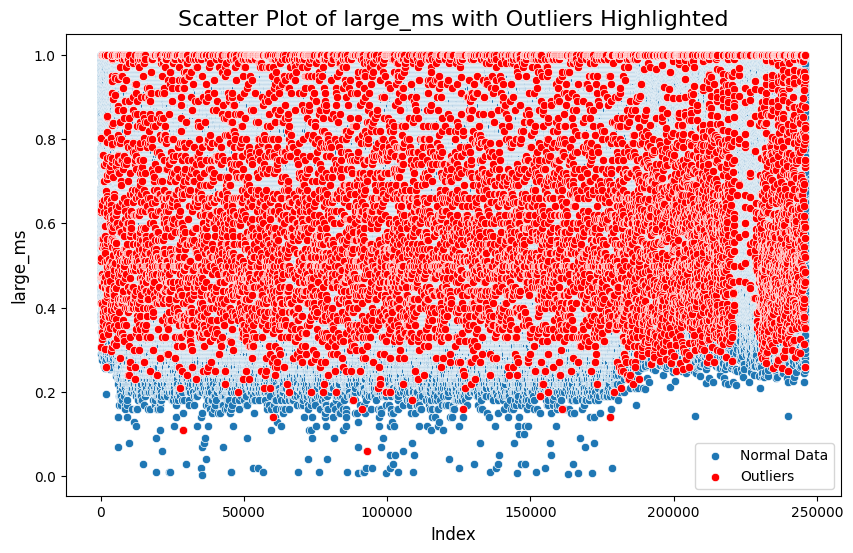

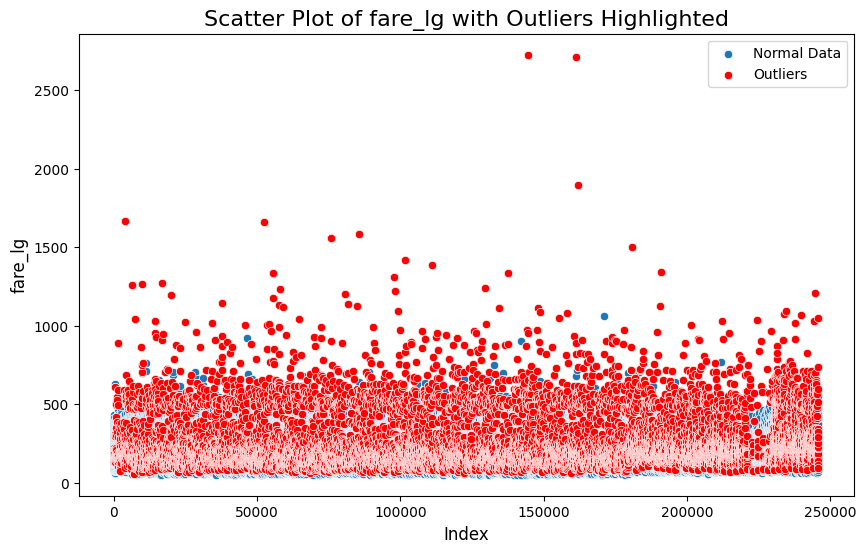

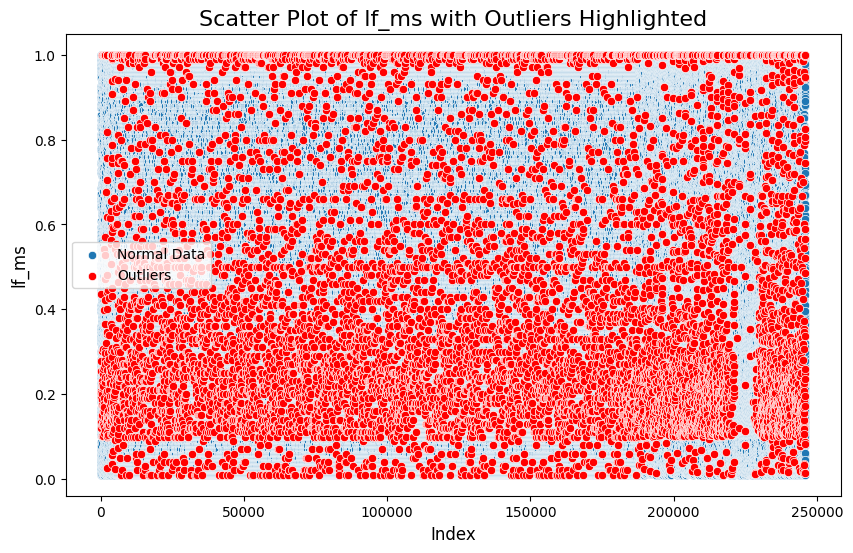

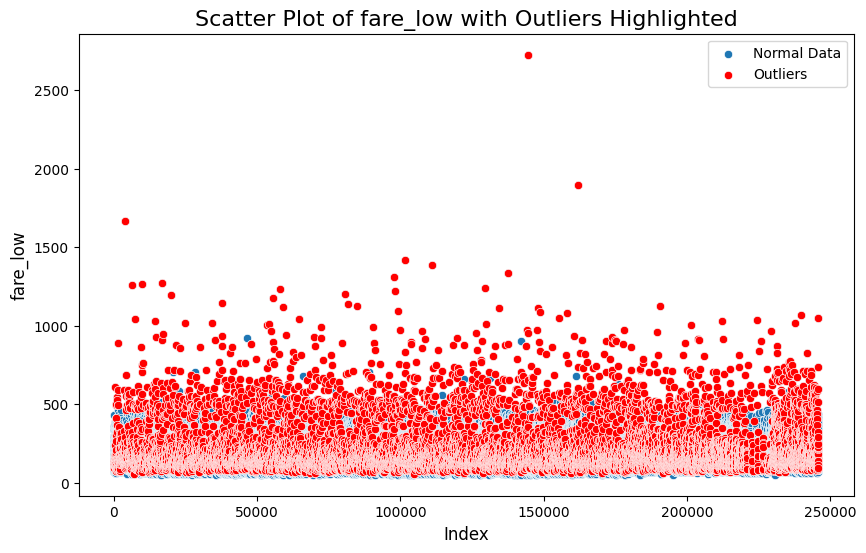

In [15]:
# Calculate Z-scores for numeric columns
z_scores = stats.zscore(data.select_dtypes(include=['float64', 'int64']))

# Identify outliers (Z-score > 3 or < -3)
outlier_condition = (z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)
df_outliers = data[outlier_condition]

# Scatter plot for each numeric column to show outliers
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=range(len(data[column])), y=data[column], label='Normal Data')
    sns.scatterplot(x=df_outliers.index, y=df_outliers[column], color='red', label='Outliers')
    plt.title(f'Scatter Plot of {column} with Outliers Highlighted', fontsize=16)
    plt.xlabel('Index', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.legend()

<ipython-input-16-8fd7c57158f3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[column], palette='crest')


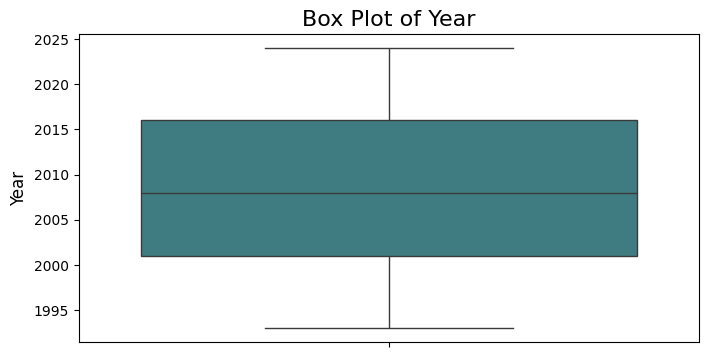

<ipython-input-16-8fd7c57158f3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[column], palette='crest')


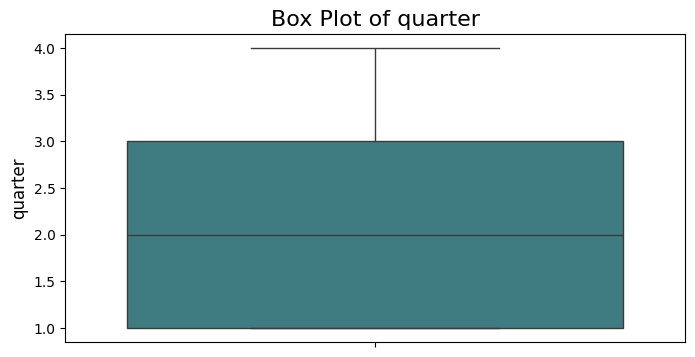

<ipython-input-16-8fd7c57158f3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[column], palette='crest')


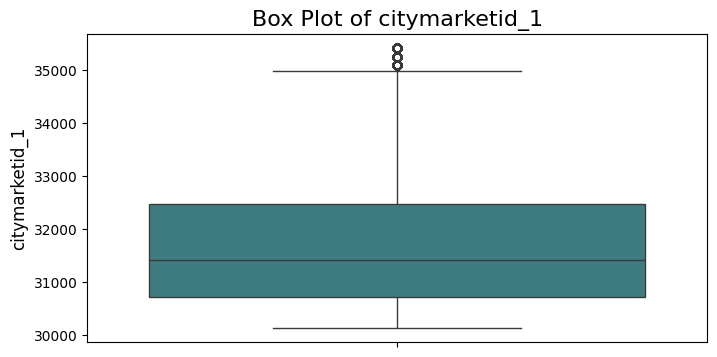

<ipython-input-16-8fd7c57158f3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[column], palette='crest')


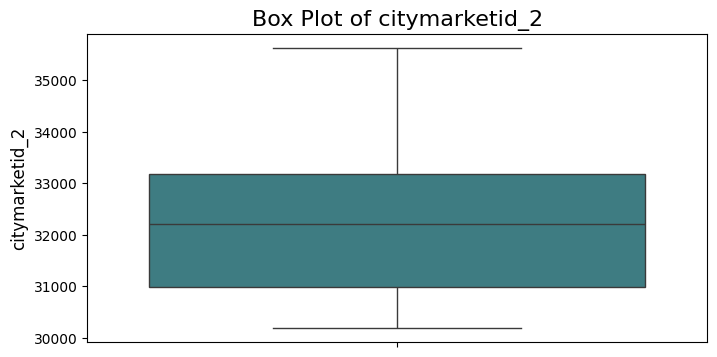

<ipython-input-16-8fd7c57158f3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[column], palette='crest')


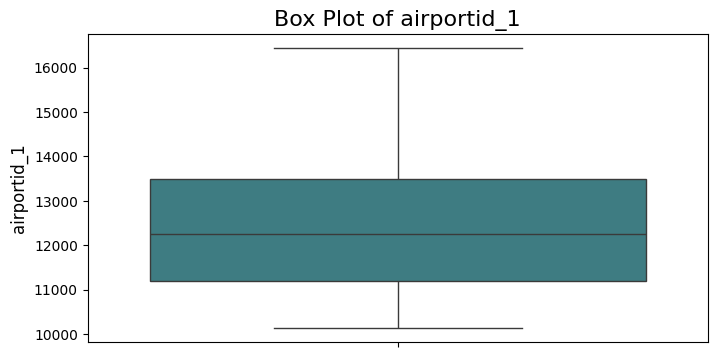

<ipython-input-16-8fd7c57158f3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[column], palette='crest')


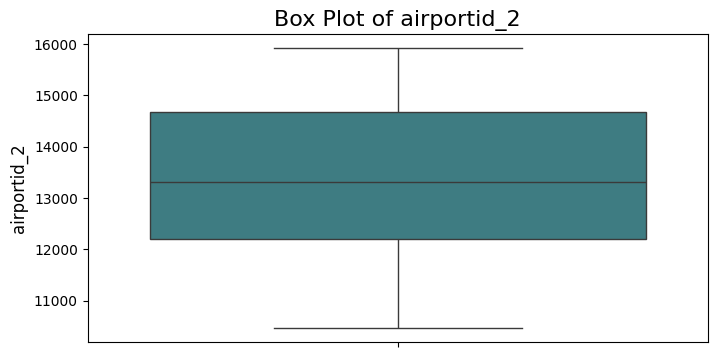

<ipython-input-16-8fd7c57158f3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[column], palette='crest')


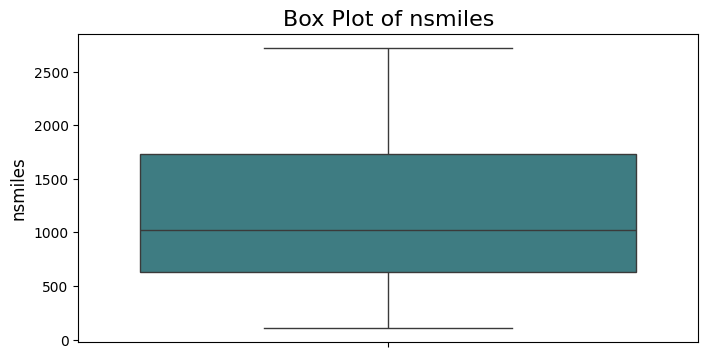

<ipython-input-16-8fd7c57158f3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[column], palette='crest')


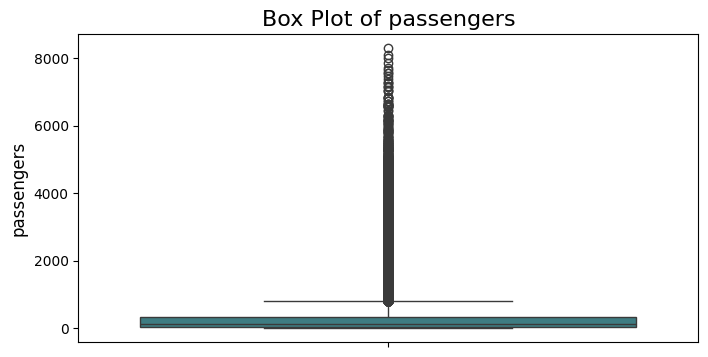

<ipython-input-16-8fd7c57158f3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[column], palette='crest')


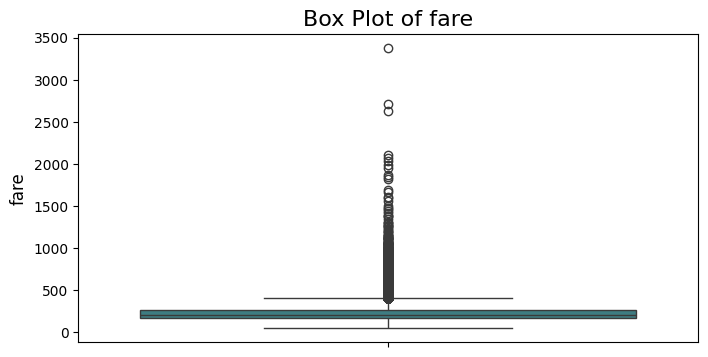

<ipython-input-16-8fd7c57158f3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[column], palette='crest')


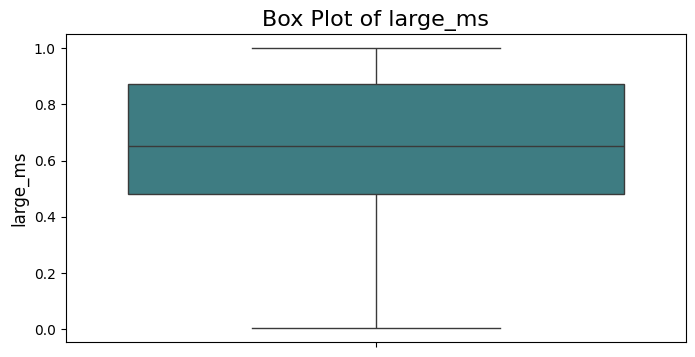

<ipython-input-16-8fd7c57158f3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[column], palette='crest')


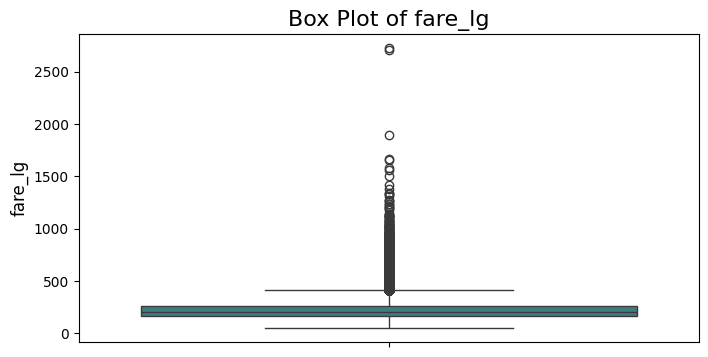

<ipython-input-16-8fd7c57158f3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[column], palette='crest')


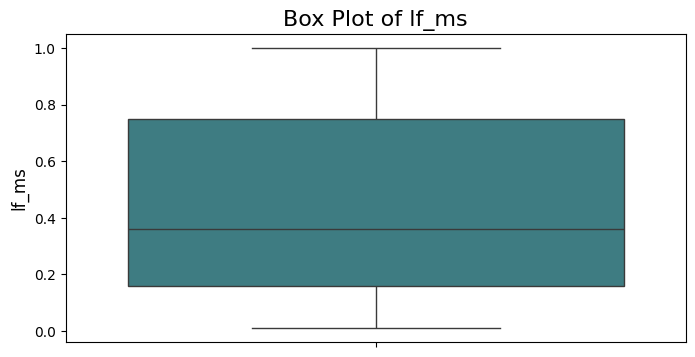

<ipython-input-16-8fd7c57158f3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[column], palette='crest')


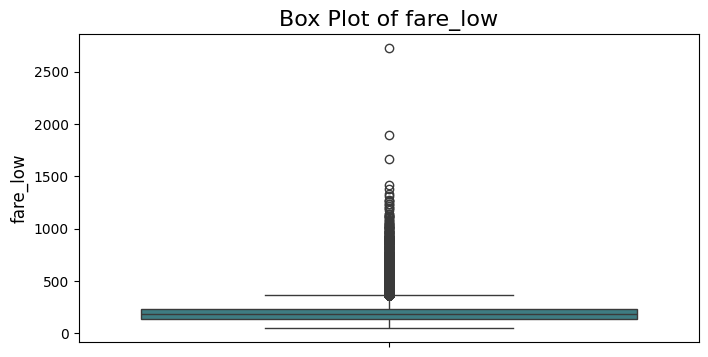

In [16]:
z_scores = stats.zscore(data.select_dtypes(include=['float64', 'int64']))

# Identify outliers (Z-score > 3 or < -3)
outlier_condition = (z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)
df_outliers = data[outlier_condition]

# Create separate box plots for each numeric column
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=data[column], palette='crest')
    plt.title(f'Box Plot of {column}', fontsize=16)
    plt.ylabel(column, fontsize=12)
    plt.show()

#**Handling Outliers**

In [17]:
# Let Remove Outliers
z_scores = stats.zscore(data.select_dtypes(include=['float64', 'int64']))

# Identify outliers (Z-score > 3 or < -3)
outlier_condition = (z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)
# Remove Outliers
new_data = data[~outlier_condition]
print (new_data.columns)
print(f' Original Data: {data.shape}')
print(f' Cleaned Data Without Outliers: {new_data.shape}')
print(f"Rows removed: {data.shape[0] - new_data.shape[0]}")


Index(['tbl', 'Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1',
       'city2', 'airportid_1', 'airportid_2', 'airport_1', 'airport_2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'Geocoded_City1', 'Geocoded_City2',
       'tbl1apk'],
      dtype='object')
 Original Data: (245955, 23)
 Cleaned Data Without Outliers: (236149, 23)
Rows removed: 9806


#**Imputing Null Values**

In [18]:
# Imputing null values >>
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

carrier_lg         1540
large_ms           1540
fare_lg            1540
carrier_low        1612
lf_ms              1612
fare_low           1612
Geocoded_City1    39206
Geocoded_City2    39206
dtype: int64


In [19]:
from sklearn.impute import SimpleImputer

# Impute carrier-related missing values
imputer_numeric = SimpleImputer(strategy='median')
data[['large_ms', 'fare_lg', 'lf_ms', 'fare_low']] = imputer_numeric.fit_transform(data[['large_ms', 'fare_lg', 'lf_ms', 'fare_low']])

imputer_categorical = SimpleImputer(strategy='most_frequent')
data[['carrier_lg', 'carrier_low']] = imputer_categorical.fit_transform(data[['carrier_lg', 'carrier_low']])

# Display the number of the remaining missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


Geocoded_City1    39206
Geocoded_City2    39206
dtype: int64


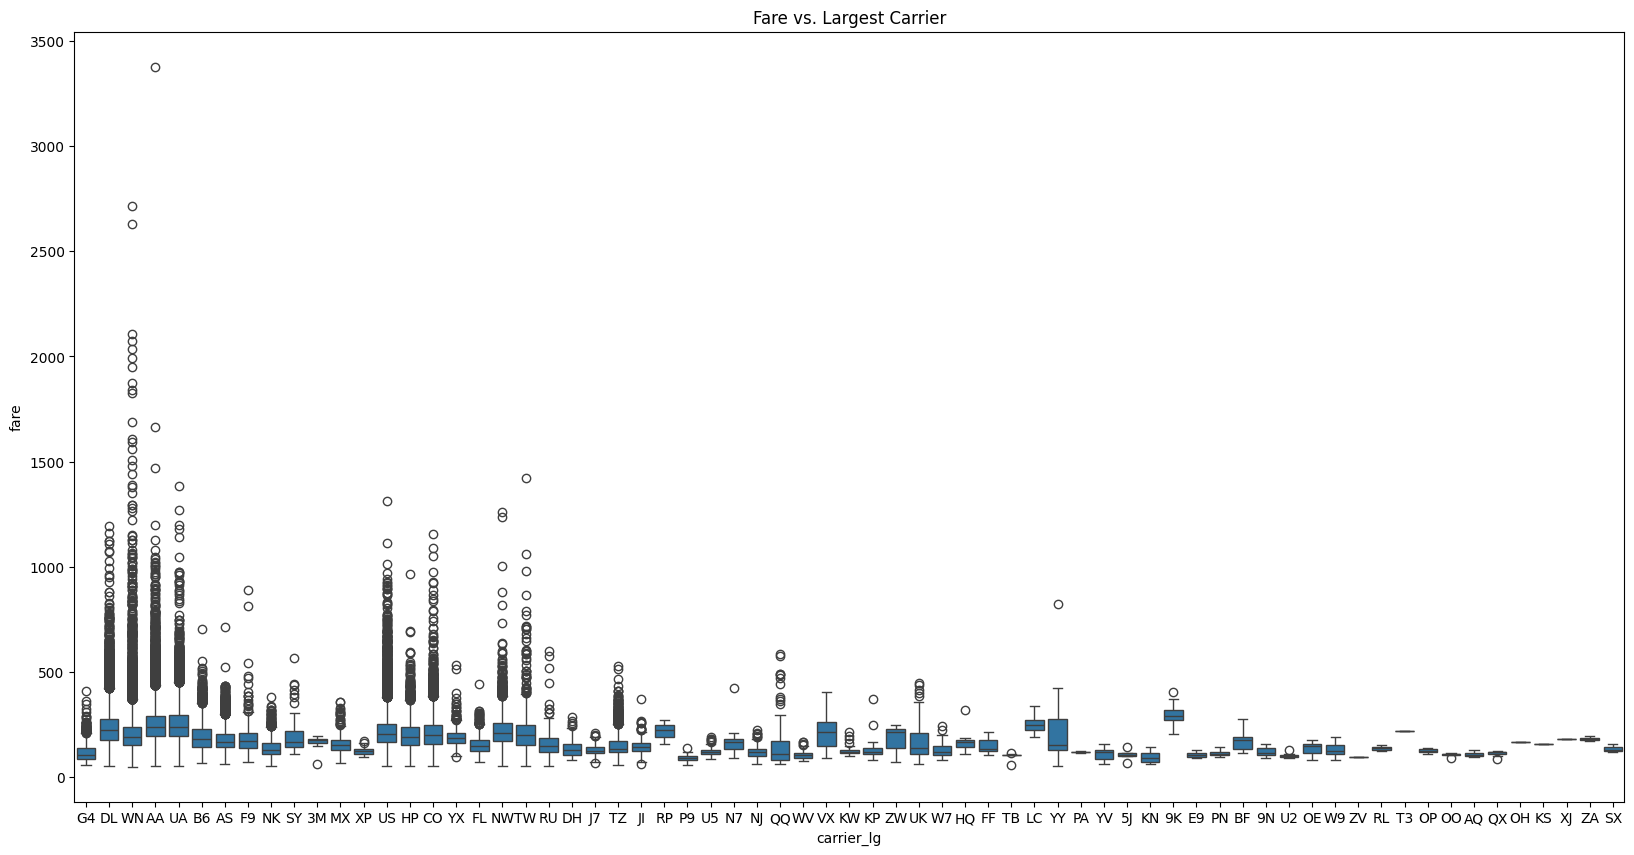

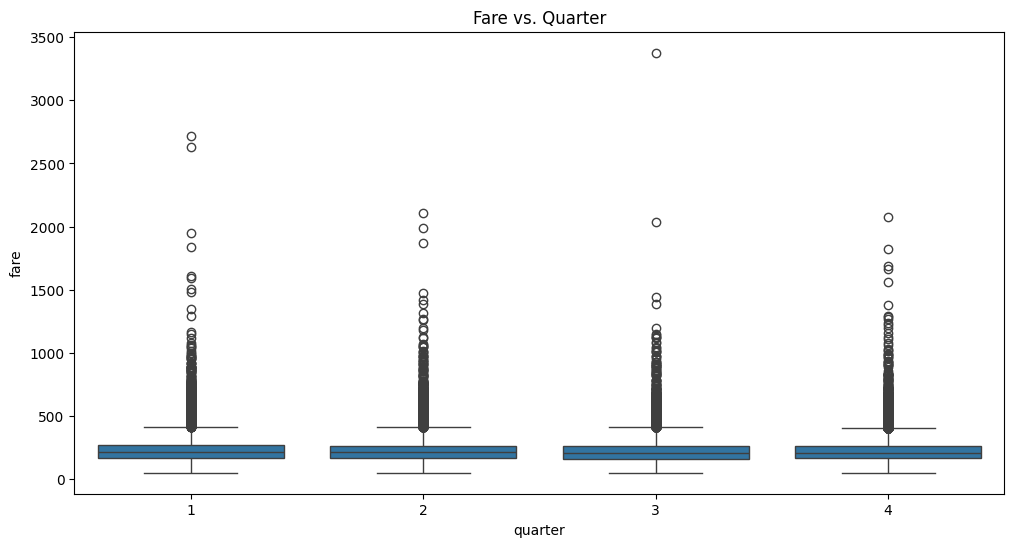

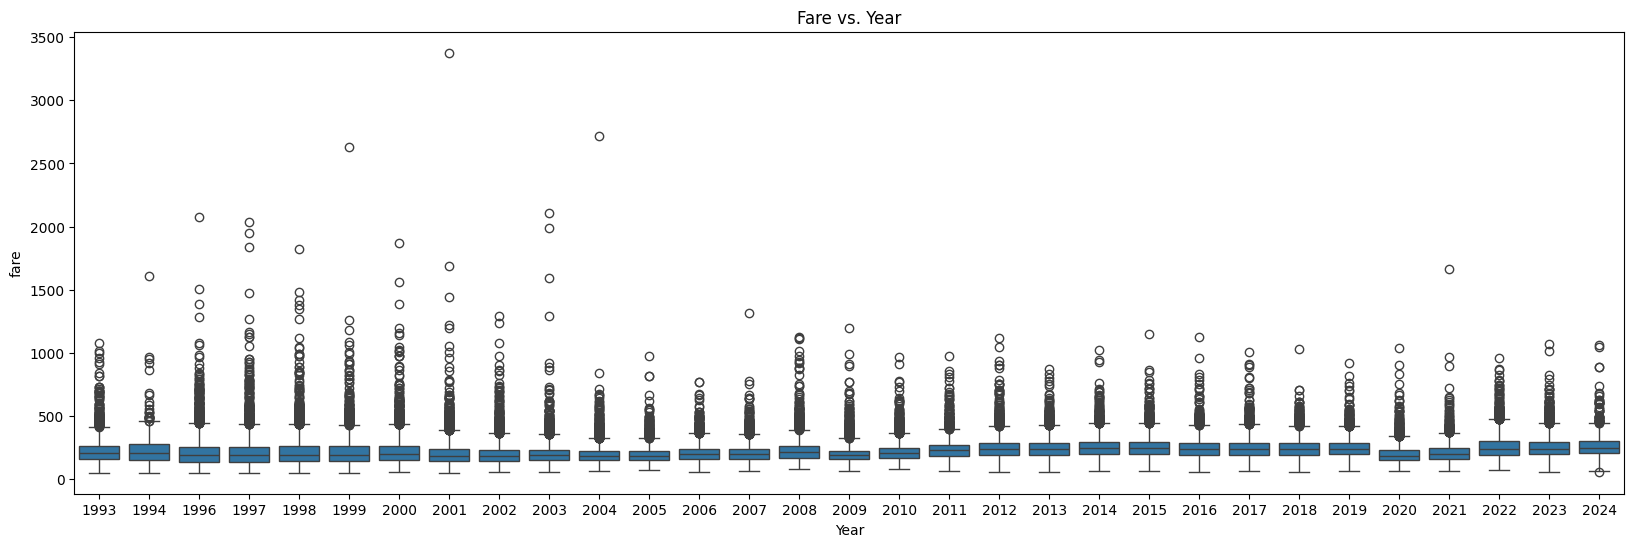

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of fare vs. carrier_lg
plt.figure(figsize=(20 , 10))
sns.boxplot(x='carrier_lg', y='fare', data=data)
plt.title('Fare vs. Largest Carrier')
plt.show()

# Box plot of fare vs. quarter
plt.figure(figsize=(12, 6))
sns.boxplot(x='quarter', y='fare', data=data)
plt.title('Fare vs. Quarter')
plt.show()

# Box plot of fare vs. year
plt.figure(figsize=(20, 6))
sns.boxplot(x='Year', y='fare', data=data)
plt.title('Fare vs. Year')
plt.show()


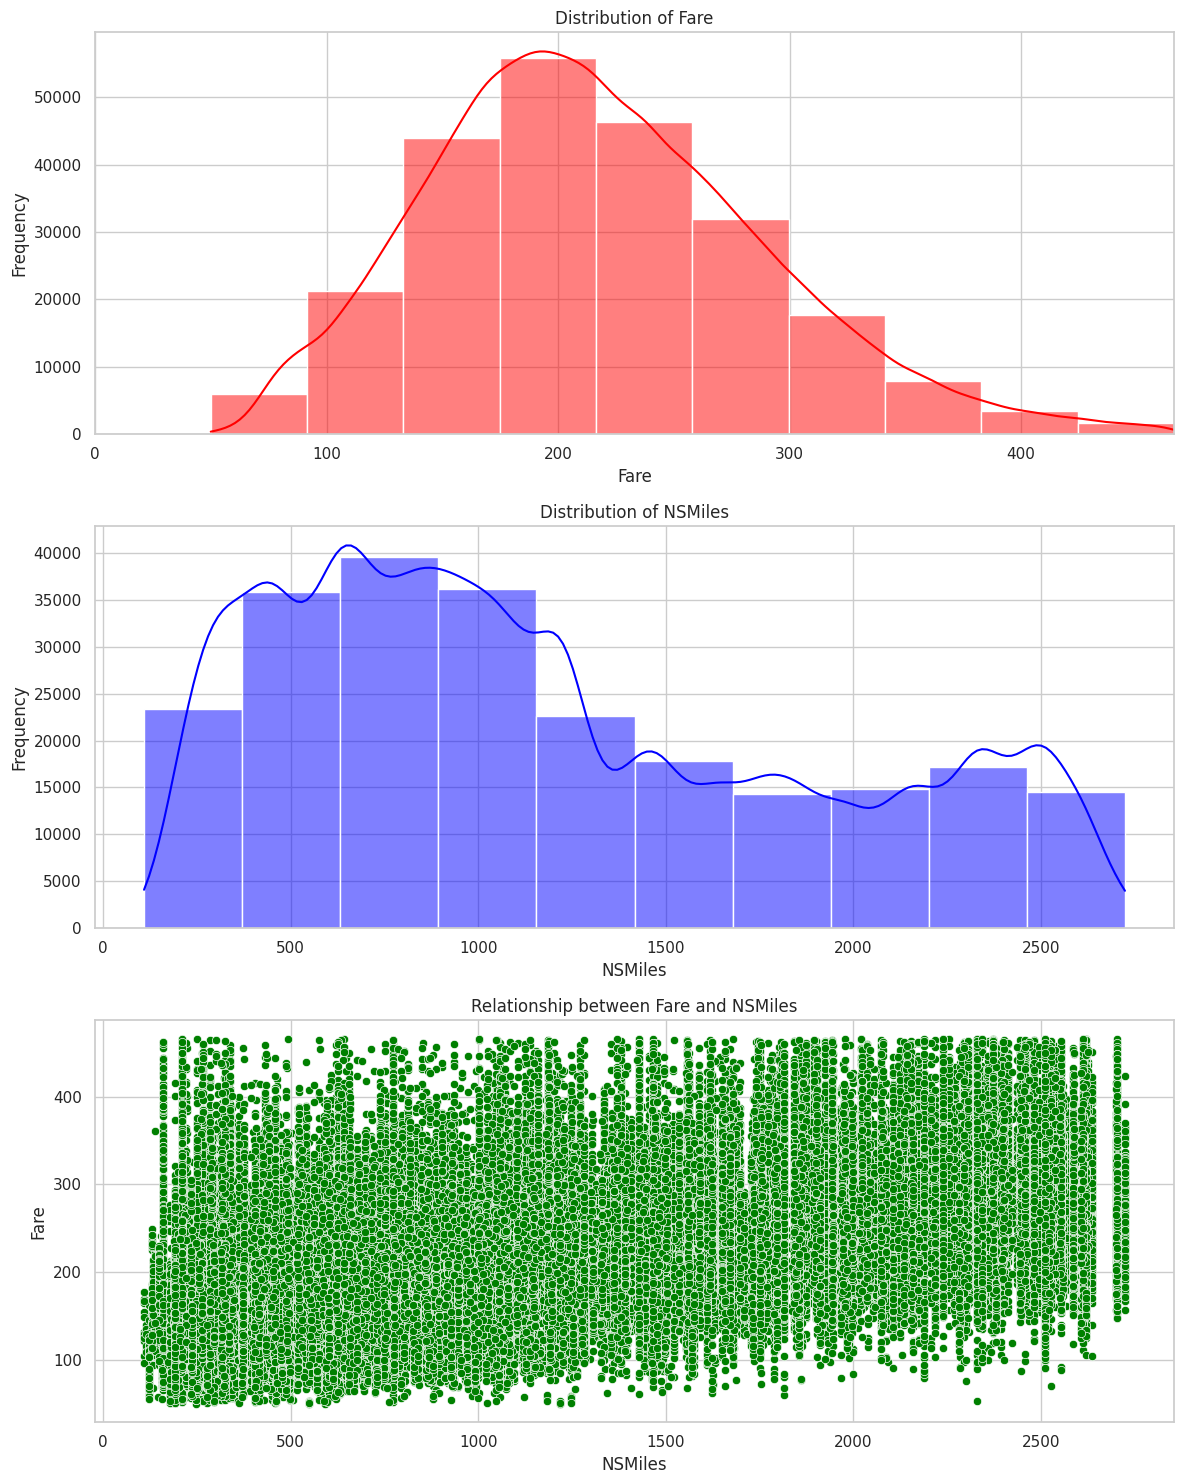

 The Correlation Between Fare and NSMiles: 0.530


In [21]:

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots for histograms and scatter plot
fig, axes = plt.subplots(3, 1, figsize=(12, 15))  # Adjusted to 3 rows, 1 column

# Histogram for fare
sns.histplot(data=new_data, x='fare', bins=10, kde=True, ax=axes[0], color='red')
axes[0].set_title('Distribution of Fare')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Frequency')

# Reduce the x-axis scale for the fare histogram
axes[0].set_xlim(0, new_data['fare'].max())  # Set the x-axis limit from 0 to max fare

# Histogram for nsmiles
sns.histplot(data=new_data, x='nsmiles', bins=10, kde=True, ax=axes[1], color='blue')
axes[1].set_title('Distribution of NSMiles')
axes[1].set_xlabel('NSMiles')
axes[1].set_ylabel('Frequency')

# Scatter plot to show the relationship between fare and nsmiles
sns.scatterplot(data=new_data, x='nsmiles', y='fare', ax=axes[2], color='green')
axes[2].set_title('Relationship between Fare and NSMiles')
axes[2].set_xlabel('NSMiles')
axes[2].set_ylabel('Fare')

# Adjust layout
plt.tight_layout()
plt.show()

# Calculate the correlation Coefficient
correlation = new_data['fare'].corr(new_data['nsmiles'])
print(f' The Correlation Between Fare and NSMiles: {correlation:.3f}')


In [22]:
# AVERAGE FARE BY YEAR

# Calculate the average fare by the years
average_year_fare = new_data.groupby('Year')['fare'].mean().reset_index()

# Column Rename
average_year_fare.columns= ['Year',  'Average Fare']

print(average_year_fare)

# Sorting in descending order
average_year_fare_order = average_year_fare.sort_values(by='Average Fare', ascending=False)
print()
print(f'The Average Price in Desecending Order')
print(average_year_fare_order)

    Year  Average Fare
0   1993    211.729818
1   1994    214.165083
2   1996    199.033113
3   1997    201.321396
4   1998    203.883054
5   1999    204.324856
6   2000    212.048543
7   2001    196.764739
8   2002    191.609860
9   2003    195.422196
10  2004    188.363423
11  2005    187.310921
12  2006    205.426836
13  2007    202.524313
14  2008    217.731407
15  2009    193.944343
16  2010    211.826215
17  2011    230.506806
18  2012    238.635096
19  2013    243.227785
20  2014    249.833418
21  2015    246.172721
22  2016    240.214447
23  2017    239.376206
24  2018    239.601787
25  2019    241.553785
26  2020    192.249697
27  2021    205.691138
28  2022    245.636788
29  2023    247.491335
30  2024    251.640956

The Average Price in Desecending Order
    Year  Average Fare
30  2024    251.640956
20  2014    249.833418
29  2023    247.491335
21  2015    246.172721
28  2022    245.636788
19  2013    243.227785
25  2019    241.553785
22  2016    240.214447
24  2018    239.6

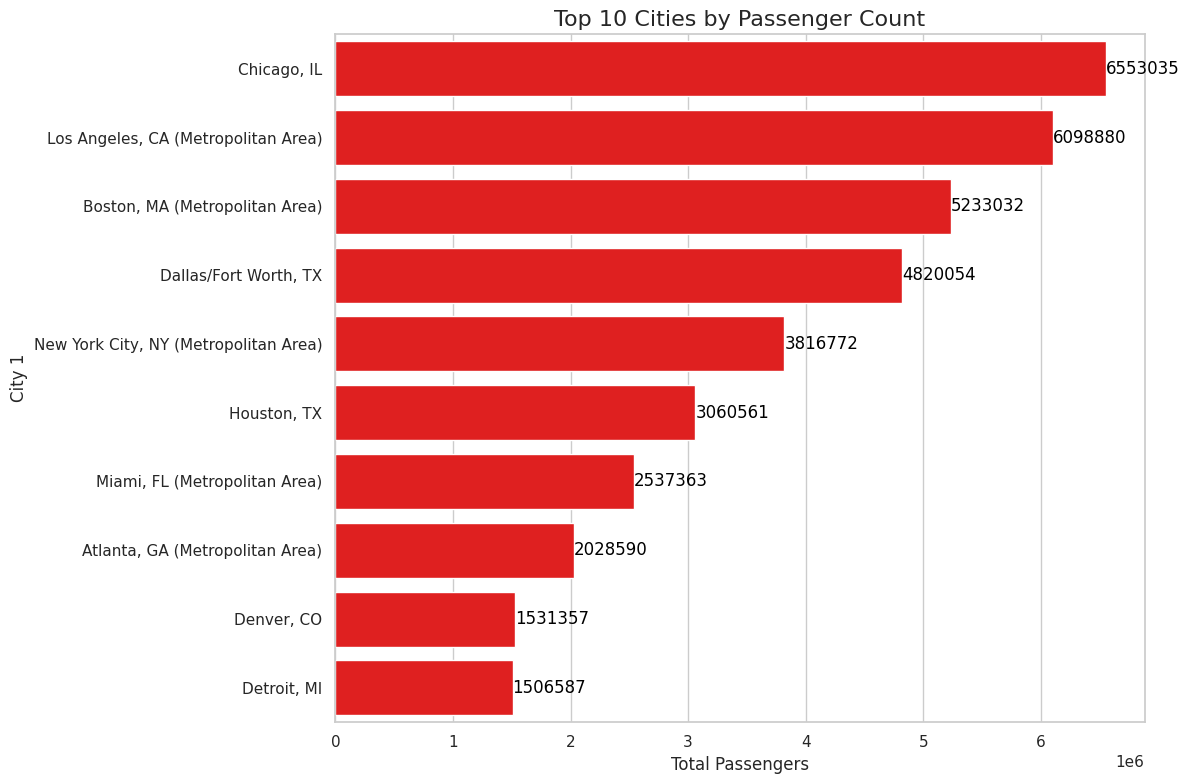

In [23]:
# PASSENGER COUNT ACROSS DIFFERENT CITIES

# Calculate total passengers by city and get the top 10
top_cities = new_data.groupby('city1')['passengers'].sum().nlargest(10).reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = sns.barplot(x='passengers', y='city1', data=top_cities, color='red')

# Add titles and labels
plt.title('Top 10 Cities by Passenger Count', fontsize=16)
plt.xlabel('Total Passengers', fontsize=12)
plt.ylabel('City 1', fontsize=12)

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',  # Format as integer
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=12,
                color='black')

# Show the plot
plt.tight_layout()
plt.show()


In [24]:

# Create a new column for airport pairs
new_data['airport_pair'] = new_data.apply(lambda row: tuple(sorted([row['airport_1'], row['airport_2']])), axis=1)

# Count the occurrences of each airport pair
common_pairs = new_data['airport_pair'].value_counts().reset_index()

# Rename columns for clarity
common_pairs.columns = ['Airport Pair', 'Count']

# Get the most common pairs
most_common_pairs = common_pairs.nlargest(10, 'Count')

# Display the result
print(most_common_pairs)



  Airport Pair  Count
0   (ABQ, DFW)    118
1   (ABQ, DAL)    118
2   (ABQ, IAH)    118
3   (DFW, ELP)    118
4   (ABQ, HOU)    118
5   (BNA, DFW)    118
6   (BWI, DFW)    118
7   (DCA, DFW)    118
8   (DFW, TUS)    118
9   (ABQ, IAD)    118


<ipython-input-24-45c7aca2f214>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['airport_pair'] = new_data.apply(lambda row: tuple(sorted([row['airport_1'], row['airport_2']])), axis=1)


In [25]:
# MOST COMMON AIRPOT_1 AND AIRPORT_2 PAIRS

# HIGHEST AVERAGE FARE FOR CITY1 ABD CITY2 COMBINATIONS

# Group by city1 and city2 and calculate the average fare
city_fare = new_data.groupby(['city1', 'city2'])['fare'].mean().reset_index()

# Find the city combinations with the highest average fare
highest_fare_cities = city_fare.nlargest(10, 'fare')

# Display the result
display(highest_fare_cities)

city1  \
44                                Aspen, CO   
626                             El Paso, TX   
620                               Eagle, CO   
793                             Jackson, WY   
776                          Huntsville, AL   
713                            Hartford, CT   
45                                Aspen, CO   
206                             Bozeman, MT   
1064  New York City, NY (Metropolitan Area)   
368                          Cincinnati, OH   

                                      city2        fare  
44            Miami, FL (Metropolitan Area)  398.735000  
626           Miami, FL (Metropolitan Area)  391.130000  
620           Miami, FL (Metropolitan Area)  382.840909  
793   New York City, NY (Metropolitan Area)  375.781477  
776     Los Angeles, CA (Metropolitan Area)  360.478889  
713                Minneapolis/St. Paul, MN  345.910000  
45    New York City, NY (Metropolitan Area)  341.788421  
206   New York City, NY (Metropolitan Area)  341.245088  
1064                       Palm Springs, CA  332.816716  
368   San Francisco, CA (Metropolitan Area)  329.818601

###**Highest Average Fare – City Pair Combinations**

* The top 10 city pairs with the **highest average airfares** reveal routes that are likely long-haul, less competitive, or served by premium/luxury carriers.
* **Aspen, CO - Miami, FL** tops the list with an average fare of **\$398.74**, suggesting a high-end or low-frequency travel route.
* **El Paso, TX** and **Eagle, CO** also have expensive connections to **Miami**, reflecting possibly seasonal or tourism-driven demand.
* Premium travel routes like **Jackson, WY - New York City** and **Aspen, CO - New York City** indicate high airfares likely due to limited carriers and wealthy traveler segments.
* Major urban routes like **Hartford - Minneapolis** and **Cincinnati - San Francisco** appear in the list, likely due to long distances or low competition on direct flights.
* These insights can guide route optimization strategies, pricing analysis, or market segmentation based on high-revenue city pairs.



In [26]:
# FEATURE ENGINEERING

# Select the features
selected_features = [
    'city1', 'city2', 'airport_1', 'airport_2', 'nsmiles',
    'carrier_lg', 'large_ms', 'carrier_low', 'lf_ms',
    'Year', 'quarter', 'passengers', 'fare_lg', 'fare_low', 'fare'
]

# Create a new DataFrame with only the selected features
new_data_selected = new_data[selected_features].copy()

# Display the first few rows of the new DataFrame
display(new_data_selected.head())


city1                          city2 airport_1  \
0  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)       ABE   
1  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)       ABE   
2                 Albuquerque, NM          Dallas/Fort Worth, TX       ABQ   
3                 Albuquerque, NM          Dallas/Fort Worth, TX       ABQ   
4                 Albuquerque, NM                    Phoenix, AZ       ABQ   

  airport_2  nsmiles carrier_lg  large_ms carrier_low   lf_ms  Year  quarter  \
0       PIE      970         G4    1.0000          G4  1.0000  2021        3   
1       TPA      970         DL    0.4659          UA  0.1193  2021        3   
2       DAL      580         WN    0.9968          WN  0.9968  2021        3   
3       DFW      580         AA    0.9774          AA  0.9774  2021        3   
4       PHX      328         WN    0.6061          AA  0.3939  2021        3   

   passengers  fare_lg  fare_low    fare  
0         180    81.43     81.43   81.43  
1          19   219.98    154.11  208.93  
2         204   184.44    184.44  184.56  
3         264   183.09    183.09  182.64  
4         398   184.49    165.77  177.11

In [27]:
#CODING OF CATEGORICAL VARIABLES

# Select the categorical features to be encoded
categorical_features = ['city1', 'city2', 'airport_1', 'airport_2', 'carrier_lg', 'carrier_low']

# Perform One-Hot Encoding
new_data_encoded = pd.get_dummies(new_data_selected, columns=categorical_features)

# Display the first few rows of the encoded DataFrame
display(new_data_encoded.head())


nsmiles  large_ms   lf_ms  Year  quarter  passengers  fare_lg  fare_low  \
0      970    1.0000  1.0000  2021        3         180    81.43     81.43   
1      970    0.4659  0.1193  2021        3          19   219.98    154.11   
2      580    0.9968  0.9968  2021        3         204   184.44    184.44   
3      580    0.9774  0.9774  2021        3         264   183.09    183.09   
4      328    0.6061  0.3939  2021        3         398   184.49    165.77   

     fare  city1_Albany, NY  ...  carrier_low_WN  carrier_low_WV  \
0   81.43             False  ...           False           False   
1  208.93             False  ...           False           False   
2  184.56             False  ...            True           False   
3  182.64             False  ...           False           False   
4  177.11             False  ...           False           False   

   carrier_low_XJ  carrier_low_XP  carrier_low_YV  carrier_low_YX  \
0           False           False           False           False   
1           False           False           False           False   
2           False           False           False           False   
3           False           False           False           False   
4           False           False           False           False   

   carrier_low_YY  carrier_low_ZA  carrier_low_ZV  carrier_low_ZW  
0           False           False           False           False  
1           False           False           False           False  
2           False           False           False           False  
3           False           False           False           False  
4           False           False           False           False  

[5 rows x 767 columns]

#**Standardscaling Dataset**

In [28]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Identify numerical features
numerical_features = ['nsmiles', 'large_ms', 'lf_ms', 'passengers', 'fare_lg', 'fare_low', 'fare']

# Handle missing values by filling with the mean
new_data_encoded[numerical_features] = new_data_encoded[numerical_features].fillna(new_data_encoded[numerical_features].mean())

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features and transform
new_data_encoded[numerical_features] = scaler.fit_transform(new_data_encoded[numerical_features])

# Display the first few rows of the scaled DataFrame
display(new_data_encoded.head())

nsmiles  large_ms     lf_ms  Year  quarter  passengers   fare_lg  \
0 -0.315125  1.482527  1.644421  2021        3   -0.193994 -1.756679   
1 -0.315125 -0.897314 -0.999996  2021        3   -0.662824  0.045301   
2 -0.871752  1.468268  1.634813  2021        3   -0.124106 -0.416932   
3 -0.871752  1.381826  1.576562  2021        3    0.050613 -0.434490   
4 -1.231420 -0.272611 -0.175474  2021        3    0.440820 -0.416282   

   fare_low      fare  city1_Albany, NY  ...  carrier_low_WN  carrier_low_WV  \
0 -1.630642 -1.872139             False  ...           False           False   
1 -0.530102 -0.103737             False  ...           False           False   
2 -0.070836 -0.441745             False  ...            True           False   
3 -0.091278 -0.468375             False  ...           False           False   
4 -0.353543 -0.545075             False  ...           False           False   

   carrier_low_XJ  carrier_low_XP  carrier_low_YV  carrier_low_YX  \
0           False           False           False           False   
1           False           False           False           False   
2           False           False           False           False   
3           False           False           False           False   
4           False           False           False           False   

   carrier_low_YY  carrier_low_ZA  carrier_low_ZV  carrier_low_ZW  
0           False           False           False           False  
1           False           False           False           False  
2           False           False           False           False  
3           False           False           False           False  
4           False           False           False           False  

[5 rows x 767 columns]

* **Missing Value Handling**:
  Before scaling, we handled missing values in numerical columns (**nsmiles**, **large_ms**, **lf_ms**, **passengers**, **fare_lg**, **fare_low**, **fare**) by replacing them with their **respective column means**. This avoids introducing bias and ensures consistency for model training.

* **Feature Scaling using StandardScaler**:
  We standardized the numerical features using **StandardScaler**, which transforms each feature to have a **mean of 0** and **standard deviation of 1**.
  This step is essential, especially for distance-based or regularized models (like **Linear Regression**, **SGD**, or **SVM**), to ensure all features contribute equally during model training.

* This transformation improves model performance, prevents domination by features with larger scales, and speeds up convergence in gradient-based models.

#**Data Preperation**

In [29]:
# Features and target
X = new_data_encoded.drop('fare', axis=1)
y = new_data_encoded['fare']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Scale data for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* **Feature and Target Definition**:
  The target variable **fare** was separated from the feature set **X**.
  This is a standard step before model training to distinguish what we want to predict (**y = fare**) from what we will use to make the prediction (**X = all other features**).

* **Train-Test Split**:
  We split the dataset into **training (60%)** and **testing (40%)** sets using **train_test_split**.
  This ensures that our model is trained on one portion of the data and tested on unseen data, helping evaluate its generalization performance.
  **random_state=42** ensures reproducibility.


#**Model Building**

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

In [33]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"Model: {name}")
    print(f"  R² Score: {r2:.5f}")
    print(f"  MAE     : {mae:.5f}")
    print(f"  MSE     : {mse:.5f}")
    print(f"  RMSE    : {rmse:.5f}\n")

    return {
        'Model': name,
        'R2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

results = []

To efficiently evaluate the performance of different regression models, we defined a custom function **evaluate_model**. This function helps us:

* **Train** any regression model using our training dataset.
* **Make predictions** on the test dataset.
* **Compute essential evaluation metrics** such as:

  * **R² Score**, which tells us how well the model explains the variance in the target variable.
  * **MAE (Mean Absolute Error)**, showing the average size of the errors.
  * **MSE (Mean Squared Error)**, which penalizes larger errors more heavily.
  * **RMSE (Root Mean Squared Error)**, providing a more interpretable error magnitude in the original unit.
* **Print the results** clearly for easy reference.
* **Return the results** in a dictionary format so we can store them for comparing multiple models.

We also initialized a list called results to collect and store the evaluation outputs from all the models we’ll test. This will help us easily compare model performances side-by-side and choose the most suitable one.


In [34]:
# Linear Regression (with scaled data)
lr = LinearRegression()
results.append(evaluate_model("Linear Regression", lr, X_train_scaled, X_test_scaled, y_train, y_test))

Model: Linear Regression
  R² Score: 0.94091
  MAE     : 0.14385
  MSE     : 0.05869
  RMSE    : 0.24225



**Linear Regression**: Linear Regression is a simple model that assumes a linear relationship between the input variables and the target variable. The model is fitted to the data by minimizing the error between predicted and actual values.


In [35]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
results.append(evaluate_model("Random Forest", rf, X_train, X_test, y_train, y_test))

Model: Random Forest
  R² Score: 0.96351
  MAE     : 0.09407
  MSE     : 0.03624
  RMSE    : 0.19036



**Random Forest**: Random Forest is an ensemble learning method that constructs multiple decision trees and combines their results for improved accuracy and robustness. It helps reduce overfitting and can handle both regression and classification tasks. we used **n_estimators=100** trees, with each tree trained on a random subset of data to enhance generalization.

In [36]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
results.append(evaluate_model("Decision Tree", dt, X_train, X_test, y_train, y_test))

Model: Decision Tree
  R² Score: 0.93159
  MAE     : 0.13163
  MSE     : 0.06795
  RMSE    : 0.26066



**Decision Tree**: Decision Tree is a non-linear model that splits the data into subsets based on the most significant features, making decisions at each node. It’s easy to interpret but can suffer from overfitting if not tuned properly. We used the model for training data to build a tree, which is then used to make predictions for new data

In [37]:
# Feature importance for Random Forest
rf_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
rf_importances = rf_importances.sort_values(by='Importance', ascending=False).head(10)

In [38]:
# XGBoost Regressor
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
results.append(evaluate_model("XGBoost", xgb, X_train, X_test, y_train, y_test))

Model: XGBoost
  R² Score: 0.96581
  MAE     : 0.09868
  MSE     : 0.03395
  RMSE    : 0.18427



**XGBoost Regressor**: XGBoost (Extreme Gradient Boosting) is a powerful ensemble method based on gradient boosting. It builds trees sequentially, with each tree correcting the errors of the previous one. Known for its high accuracy and efficiency. It is highly effective for both regression and classification problems, and the **objective='reg:squarederror'** is used for regression tasks, optimizing for squared error loss.


#**Model Comparision**

In [39]:
summary = pd.DataFrame(results)
print("\nModel Comparison:")
summary.sort_values(by='R2', ascending=False).reset_index(drop=True)


Model Comparison:


Model        R2       MAE       MSE      RMSE
0            XGBoost  0.965813  0.098684  0.033954  0.184267
1      Random Forest  0.963515  0.094074  0.036237  0.190359
2  Linear Regression  0.940912  0.143849  0.058686  0.242251
3      Decision Tree  0.931588  0.131628  0.067946  0.260664

1. **XGBoost**:

   * **R²**: 0.9658 – This model explains 96.58% of the variance in the target variable, making it the top performer.
   * **MAE**: 0.0987 – The average error in predictions is 0.0987, which is relatively low.
   * **MSE**: 0.0339 – A low mean squared error indicates fewer large prediction errors.
   * **RMSE**: 0.1843 – Root mean squared error, which is still small, demonstrating solid performance.

2. **Random Forest**:

   * **R²**: 0.9635 – Very close to XGBoost, it explains 96.35% of the variance.
   * **MAE**: 0.0941 – Slightly better than XGBoost in terms of mean absolute error.
   * **MSE**: 0.0362 – Slightly higher than XGBoost, but still performs well.
   * **RMSE**: 0.1904 – Close to XGBoost, indicating good generalization ability.

3. **Linear Regression**:

   * **R²**: 0.9409 – Still a strong score, but a bit lower compared to the tree-based models.
   * **MAE**: 0.1438 – This is higher, showing the linear model's predictions are less accurate.
   * **MSE**: 0.0587 – The MSE is notably higher, indicating more significant errors than the tree-based models.
   * **RMSE**: 0.2423 – The highest RMSE, suggesting this model has larger deviations in its predictions.

4. **Decision Tree**:

   * **R²**: 0.9316 – Slightly lower than the others, but still a decent performance.
   * **MAE**: 0.1316 – Comparable to Linear Regression but better than the tree-based models.
   * **MSE**: 0.0679 – Higher MSE indicates larger errors compared to the other models.
   * **RMSE**: 0.2607 – The highest RMSE, showing that the model has larger discrepancies in its predictions.


### Conclusion:

* **XGBoost** emerges as the best-performing model, with the highest R² and the lowest RMSE, making it a highly accurate and reliable model for this regression task.
* **Random Forest** follows closely behind, offering competitive results.
* **Linear Regression** and **Decision Tree** still perform well, but their errors are more pronounced compared to the more sophisticated ensemble methods.


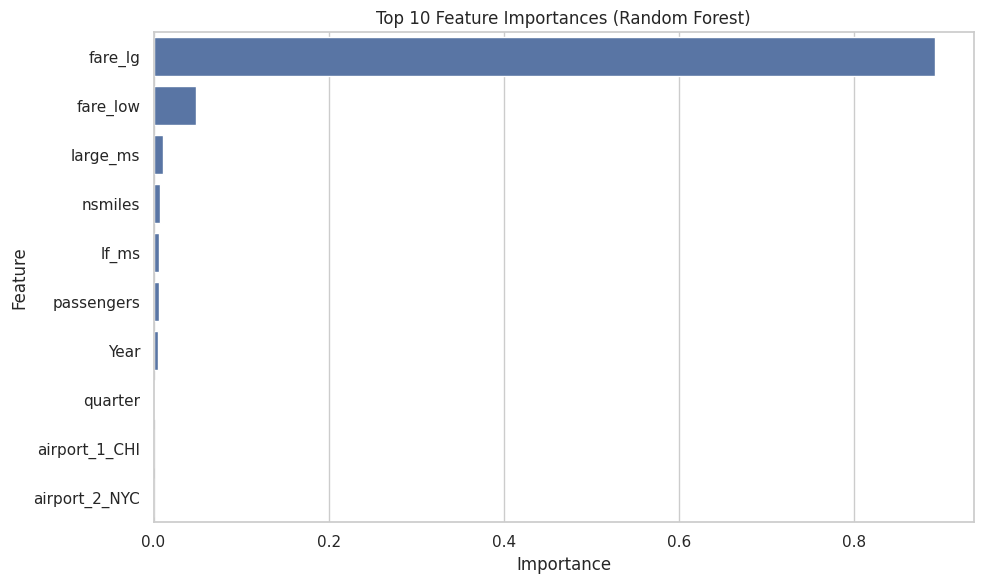

In [40]:
# Feature importance for Random Forest
rf_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
rf_importances = rf_importances.sort_values(by='Importance', ascending=False).head(10)

# Show top 10 features from Random Forest
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importances)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#**Dropping Fare_lg and fare_low**

In [43]:
# Features and target
X = new_data_encoded.drop(['fare','fare_lg','fare_low'], axis=1)
y = new_data_encoded['fare']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Scale data for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Linear Regression (with scaled data)
lr = LinearRegression()
results.append(evaluate_model("Linear Regression", lr, X_train_scaled, X_test_scaled, y_train, y_test))

Model: Linear Regression
  R² Score: 0.54797
  MAE     : 0.50914
  MSE     : 0.44895
  RMSE    : 0.67004



In [45]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
results.append(evaluate_model("Random Forest", rf, X_train, X_test, y_train, y_test))

Model: Random Forest
  R² Score: 0.81663
  MAE     : 0.27965
  MSE     : 0.18212
  RMSE    : 0.42676



In [46]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
results.append(evaluate_model("Decision Tree", dt, X_train, X_test, y_train, y_test))

Model: Decision Tree
  R² Score: 0.64737
  MAE     : 0.38317
  MSE     : 0.35022
  RMSE    : 0.59180



In [47]:
# Feature importance for Random Forest
rf_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
rf_importances = rf_importances.sort_values(by='Importance', ascending=False).head(10)

In [48]:
# XGBoost Regressor
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
results.append(evaluate_model("XGBoost", xgb, X_train, X_test, y_train, y_test))

Model: XGBoost
  R² Score: 0.74809
  MAE     : 0.36350
  MSE     : 0.25020
  RMSE    : 0.50020



In [49]:
summary = pd.DataFrame(results)
print("\nModel Comparison:")
summary.sort_values(by='R2', ascending=False).reset_index(drop=True)


Model Comparison:


Model        R2       MAE       MSE      RMSE
0      Random Forest  0.816631  0.279651  0.182120  0.426755
1            XGBoost  0.748088  0.363502  0.250197  0.500197
2      Decision Tree  0.647374  0.383173  0.350224  0.591797
3  Linear Regression  0.547969  0.509135  0.448952  0.670039

1. **Random Forest**:

   * **R²**: 0.8166 – The model still explains 81.66% of the variance, but the performance drops substantially compared to the previous scenario.
   * **MAE**: 0.2797 – The average error increases, indicating more significant prediction deviations.
   * **MSE**: 0.1821 – Larger error terms are observed compared to when all features were included.
   * **RMSE**: 0.4268 – The root mean squared error has risen, reflecting less accurate predictions.

2. **XGBoost**:

   * **R²**: 0.7481 – A notable decline in R², suggesting the model now explains less of the variance (down from 96.58% to 74.81%).
   * **MAE**: 0.3635 – Higher mean absolute error shows a decrease in prediction accuracy.
   * **MSE**: 0.2502 – MSE has increased, reflecting larger prediction errors.
   * **RMSE**: 0.5002 – A higher RMSE further indicates poorer model performance.

3. **Decision Tree**:

   * **R²**: 0.6474 – The model performs the worst among the models, with R² significantly dropping from 93.16% to 64.74%.
   * **MAE**: 0.3832 – This increase shows that predictions are less accurate.
   * **MSE**: 0.3502 – A substantial increase in MSE compared to the previous scenario.
   * **RMSE**: 0.5918 – The highest RMSE, showing a significant rise in prediction errors.

4. **Linear Regression**:

   * **R²**: 0.5480 – Linear Regression drops significantly in performance, explaining only 54.80% of the variance.
   * **MAE**: 0.5091 – A large increase in MAE, indicating a high average error in predictions.
   * **MSE**: 0.4490 – A sharp increase in MSE, showing larger prediction errors.
   * **RMSE**: 0.6700 – The highest RMSE among all models, indicating poor predictive accuracy.


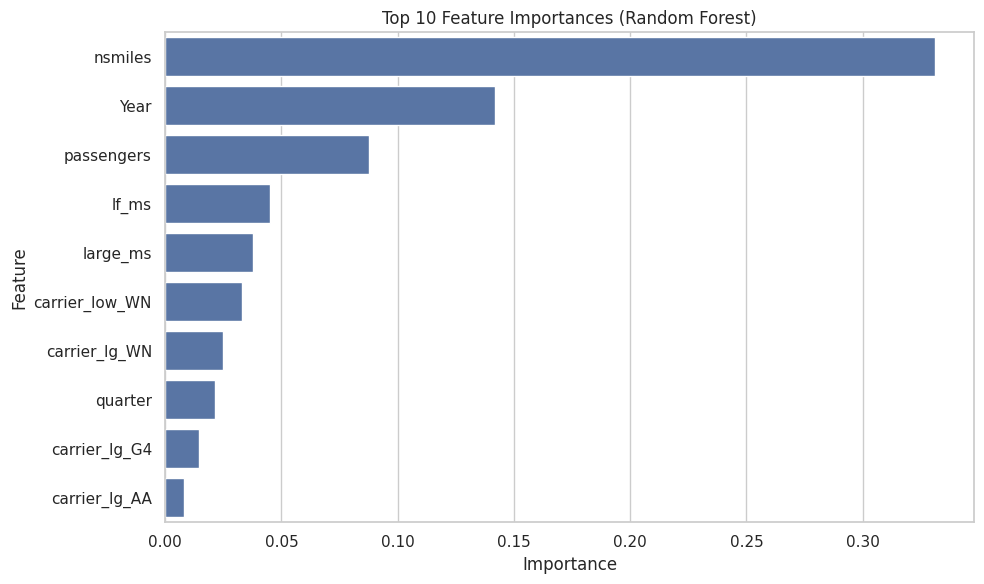

In [50]:
# Feature importance for Random Forest
rf_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
rf_importances = rf_importances.sort_values(by='Importance', ascending=False).head(10)

# Show top 10 features from Random Forest
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importances)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

##**Insights and Observations:**

* **XGBoost** and **Random Forest** show a significant decrease in performance after the removal of **fare**, **fare_lg**, and **fare_low**. XGBoost’s R² drops from 96.58% to 74.81%, while Random Forest drops from 96.35% to 81.66%. This suggests that these features were important for capturing the variance in the target variable.
* **Decision Tree** and **Linear Regression** also suffer a noticeable performance drop. Decision Tree's R² drops from 93.16% to 64.74%, and Linear Regression’s R² drops from 94.09% to 54.80%.
* **RMSE** values for all models increase significantly, indicating larger errors in predictions after removing these key features.
* The inclusion of the **fare**, **fare_lg**, and **fare_low** features played an important role in improving the models' ability to explain the variance in the target variable and reducing prediction errors.

###**Conclusion:**

Removing the fare, fare_lg, and fare_low features led to a clear decrease in model performance across all algorithms. This highlights the importance of these features in predicting the target variable effectively. Based on the comparison, we can conclude that for the most accurate and reliable predictions, including all available features is crucial, especially for models like XGBoost and Random Forest, which benefit the most from these features.
